Practical No 02 (A)

Multiclass classification using Deep Neural Networks: Example: Use the OCR letter recognition dataset 
Data set Link :- https://archive.ics.uci.edu/ml/datasets/letter+recognition


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks

In [2]:
df = pd.read_csv('letter-recognition.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

In [5]:
df

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
df['letter'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

U    4.1%
D    4.0%
P    4.0%
T    4.0%
M    4.0%
A    3.9%
X    3.9%
Y    3.9%
N    3.9%
Q    3.9%
F    3.9%
G    3.9%
E    3.8%
B    3.8%
V    3.8%
L    3.8%
R    3.8%
I    3.8%
O    3.8%
W    3.8%
S    3.7%
J    3.7%
K    3.7%
C    3.7%
H    3.7%
Z    3.7%
Name: letter, dtype: object

In [7]:
df_without_letter_column = df.loc[:, df.columns != 'letter']
letter_column = df['letter']
x = df_without_letter_column.values 
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.insert(0, 'letter', letter_column)

In [8]:
df.columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,I,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,D,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,N,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,G,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333,0.200000,0.466667
19996,C,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000,0.200000,0.466667
19997,T,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000,0.133333,0.266667
19998,S,0.133333,0.200000,0.266667,0.133333,0.066667,0.533333,0.466667,0.133333,0.400000,0.666667,0.400000,0.533333,0.066667,0.600000,0.333333,0.533333


In [9]:
X = df.drop('letter', axis=1)
y = df['letter']

In [10]:
X_train = X.loc[:15999]
y_train = y.loc[:15999]
X_test = X.loc[16000:]
y_test = y.loc[16000:]

In [11]:
def evaluate(model):
    model.fit(X_train, y_train)
    x_train_prediction = model.predict(X_train)
    x_test_prediction = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, x_train_prediction)
    test_accuracy = accuracy_score(y_test, x_test_prediction)
    clf_report = classification_report(y_test, x_test_prediction)
    print(f'Train set accuracy: {train_accuracy:.2f}')
    print(f'Test set accuracy: {test_accuracy:.2f}' + '\n')
    print(clf_report + '\n')

In [12]:
model = KNeighborsClassifier()
evaluate(model)

Train set accuracy: 0.98
Test set accuracy: 0.95

              precision    recall  f1-score   support

           A       0.98      0.99      0.99       156
           B       0.86      0.97      0.91       136
           C       0.96      0.96      0.96       142
           D       0.89      0.98      0.93       167
           E       0.90      0.94      0.92       152
           F       0.91      0.93      0.92       153
           G       0.97      0.93      0.95       164
           H       0.84      0.87      0.86       151
           I       0.93      0.96      0.95       165
           J       0.96      0.92      0.94       148
           K       0.92      0.89      0.91       146
           L       0.99      0.97      0.98       157
           M       0.97      0.97      0.97       144
           N       0.96      0.90      0.93       166
           O       0.94      0.94      0.94       139
           P       0.96      0.89      0.93       168
           Q       0.94      0.

In [13]:
k_range = list(range(1, 9))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=2)
  
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=1; total time=   0.7s
[CV] END ......................................n_neighbors=1; total time=   0.7s
[CV] END ......................................n_neighbors=1; total time=   0.4s
[CV] END ......................................n_neighbors=2; total time=   0.5s
[CV] END ......................................n

In [14]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [15]:
model = KNeighborsClassifier(**grid_search.best_params_)
evaluate(model)

Train set accuracy: 1.00
Test set accuracy: 0.96

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       156
           B       0.91      0.95      0.93       136
           C       0.96      0.96      0.96       142
           D       0.94      0.97      0.95       167
           E       0.96      0.92      0.94       152
           F       0.92      0.92      0.92       153
           G       0.96      0.96      0.96       164
           H       0.91      0.89      0.90       151
           I       0.95      0.97      0.96       165
           J       0.97      0.94      0.96       148
           K       0.91      0.91      0.91       146
           L       0.97      0.97      0.97       157
           M       0.99      0.97      0.98       144
           N       0.97      0.95      0.96       166
           O       0.94      0.97      0.95       139
           P       0.95      0.93      0.94       168
           Q       0.95      0.

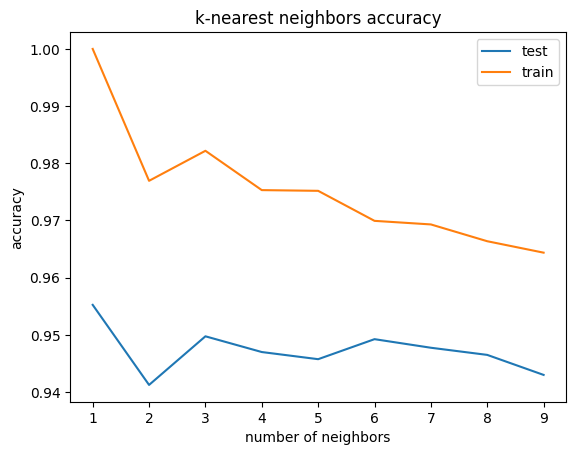

In [16]:
no_neighbors = np.arange(1, 10, 1)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    train_accuracy[i] = model.score(X_train, y_train)
    test_accuracy[i] = model.score(X_test, y_test)

plt.title('k-nearest neighbors accuracy')
plt.plot(no_neighbors, test_accuracy, label='test')
plt.plot(no_neighbors, train_accuracy, label='train')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.show()

In [17]:
encoder = LabelEncoder()

encoder.fit(y_train)
train_labels = encoder.transform(y_train)

encoder.fit(y_test)
test_labels = encoder.transform(y_test)

In [18]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(16,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=26, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001, 
    patience=10, 
    restore_best_weights=True)

history = model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=200, batch_size=16, callbacks=[early_stopping])

Epoch 1/200
1000/1000 [==============================] - 4s 3ms/step - loss: 2.1883 - accuracy: 0.3985 - val_loss: 1.5709 - val_accuracy: 0.5725
Epoch 2/200
1000/1000 [==============================] - 3s 3ms/step - loss: 1.3564 - accuracy: 0.6252 - val_loss: 1.2960 - val_accuracy: 0.6432
Epoch 3/200
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1600 - accuracy: 0.6779 - val_loss: 1.1452 - val_accuracy: 0.6935
Epoch 4/200
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0444 - accuracy: 0.7119 - val_loss: 1.0405 - val_accuracy: 0.7107
Epoch 5/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9599 - accuracy: 0.7349 - val_loss: 0.9784 - val_accuracy: 0.7212
Epoch 6/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8992 - accuracy: 0.7503 - val_loss: 0.9213 - val_accuracy: 0.7418
Epoch 7/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.8487 - accuracy: 0.7606 - val_loss: 0.8784 - val_ac

In [19]:
x_train_prediction = model.predict(X_train) 
y_classes = x_train_prediction.argmax(axis=-1)
train_accuracy = accuracy_score(train_labels, y_classes)
print(f'Train set accuracy: {train_accuracy:.2f}')

500/500 [==============================] - 1s 1ms/step
Train set accuracy: 0.95


In [20]:
x_test_prediction = model.predict(X_test) 
y_classes = x_test_prediction.argmax(axis=-1)
test_accuracy = accuracy_score(test_labels, y_classes)
print(f'Test set accuracy: {test_accuracy:.2f}')

125/125 [==============================] - 0s 1ms/step
Test set accuracy: 0.93


In [21]:
clf_report = classification_report(encoder.inverse_transform(test_labels), encoder.inverse_transform(y_classes))
print(clf_report)

              precision    recall  f1-score   support

           A       0.97      0.95      0.96       156
           B       0.89      0.96      0.92       136
           C       0.94      0.94      0.94       142
           D       0.87      0.95      0.91       167
           E       0.92      0.86      0.89       152
           F       0.89      0.90      0.89       153
           G       0.89      0.87      0.88       164
           H       0.87      0.84      0.86       151
           I       0.97      0.88      0.92       165
           J       0.91      0.97      0.93       148
           K       0.86      0.96      0.91       146
           L       0.94      0.95      0.95       157
           M       0.95      0.98      0.97       144
           N       0.97      0.91      0.94       166
           O       0.88      0.94      0.91       139
           P       0.91      0.94      0.92       168
           Q       0.95      0.92      0.93       168
           R       0.88    

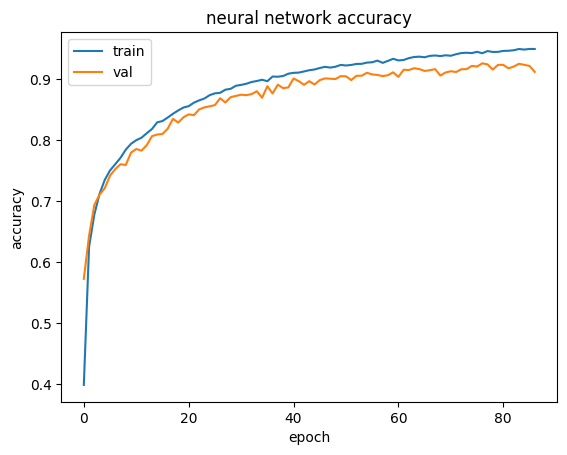

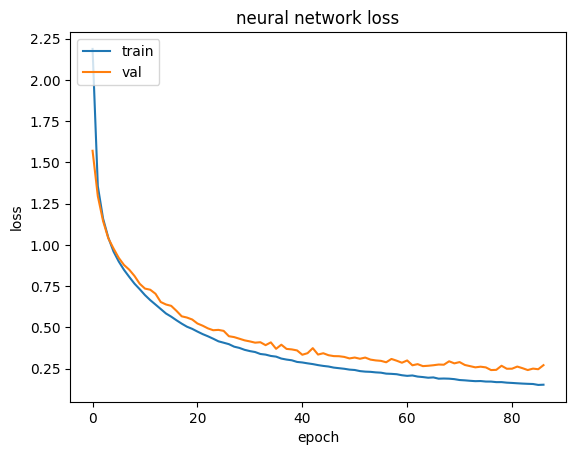

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('neural network accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('neural network loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()